In [1]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time
import torchvision.models as models
from matplotlib import pyplot as plt

In [2]:
device = torch.device("mps")
device

device(type='mps')

### LOAD DATA

In [3]:
image_transforms = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness = 0.2, contrast =0.2),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        
    ]
)

In [4]:
dataset_path = "./dataset"

dataset = datasets.ImageFolder(root=dataset_path, transform=image_transforms)
len(dataset)                               

2300

In [28]:
num_classes = len(dataset.classes)
num_classes

6

In [30]:
class_names = dataset.classes
class_names

['F_Breakage', 'F_Crushed', 'F_Normal', 'R_Breakage', 'R_Crushed', 'R_Normal']

In [6]:
train_size = int(len(dataset)*0.75)
val_size = int(len(dataset) - train_size)

train_size, val_size


(1725, 575)

In [7]:
from torch.utils.data import random_split

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [8]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle = True)

In [10]:
for images, labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 3, 224, 224])
torch.Size([32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.9428324].


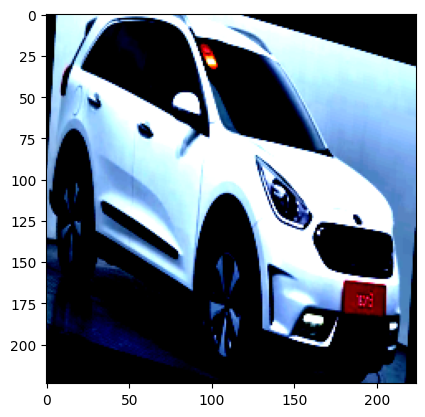

In [15]:
plt.imshow(images[1].permute(1,2,0))
plt.show()

### Model 1: CNN

In [ ]:
class CarClassifierCNN(nn.Module):
    def __init__(self):
        super.__inti__()